## BCIS 5110 Analysis of JD Data

In [2]:
# This code appears in every demonstration Notebook.
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### We will analyze JD Data in the rest of our assignments.
The objective: to build models to accurately predict delivery times for customer orders.<br>
The data: We need the following tables from the JD.com data<br>
        1. Order<br>
        2. User<br>
        3. Delivery<br>
        4. Inventory<br>
        5. Network<br>        

#### Assignment 8 include Q1 - Q10.

1. Import necessary packages.

In [3]:
import pandas as pd  
import numpy as np   
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.ensemble import RandomForestRegressor 

2. Read in the five csv files.

In [4]:
user_data = pd.read_csv('C:\\Users\\prana\\Downloads\\JD Data (2)\\JD Data\\JD_user_data.csv')
delivery_data = pd.read_csv('C:\\Users\\prana\\Downloads\\JD Data (2)\\JD Data\\JD_delivery_data.csv')
inventory_data = pd.read_csv('C:\\Users\\prana\\Downloads\\JD Data (2)\\JD Data\\JD_inventory_data.csv')
network_data = pd.read_csv('C:\\Users\\prana\\Downloads\\JD Data (2)\\JD Data\\JD_network_data.csv')
order_data = pd.read_csv('C:\\Users\\prana\\Downloads\\JD Data (2)\\JD Data\\JD_order_data.csv')
sku_data = pd.read_csv('C:\\Users\\prana\\Downloads\\JD Data (2)\\JD Data\\JD_sku_data.csv') 
click_data = pd.read_csv('C:\\Users\\prana\\Downloads\\JD Data (2)\\JD Data\\JD_click_data.csv')

3. Display a sample of each data frame. How many observations? How many columns? What are the column names? (Use code to display such information.)

In [5]:
#sample data for orders data
print("print the order data")
print(order_data.head())

#sample data for users data
print("print the users data")
print(user_data.head())

#sample data for delivery data
print("print the delivery data")
print(delivery_data.head())

#sample data for Invetntory data
print("print the inventory data")
print(inventory_data.head())

#sample data for network data
print("print the network data")
print(network_data.head())

#sample data for sku data
print("print the sku data")
print(sku_data.head())

#sample data for click data
print("print the click data")
print(click_data.head())

print the order data
     order_ID     user_ID      sku_ID  order_date             order_time  \
0  d0cf5cc6db  0abe9ef2ce  581d5b54c1  2018-03-01  2018-03-01 17:14:25.0   
1  7444318d01  33a9e56257  067b673f2b  2018-03-01  2018-03-01 11:10:40.0   
2  f973b01694  4ea3cf408f  623d0a582a  2018-03-01  2018-03-01 09:13:26.0   
3  8c1cec8d4b  b87cb736cb  fc5289b139  2018-03-01  2018-03-01 21:29:50.0   
4  d43a33c38a  4829223b6f  623d0a582a  2018-03-01  2018-03-01 19:13:37.0   

   quantity  type promise  original_unit_price  final_unit_price  \
0         1     2       -                 89.0              79.0   
1         1     1       2                 99.9              53.9   
2         1     1       2                 78.0              58.5   
3         1     1       2                 61.0              35.0   
4         1     1       1                 78.0              53.0   

   direct_discount_per_unit  quantity_discount_per_unit  \
0                       0.0                        10.

In [6]:
delivery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293229 entries, 0 to 293228
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   package_ID        293229 non-null  object
 1   order_ID          293229 non-null  object
 2   type              293229 non-null  int64 
 3   ship_out_time     293229 non-null  object
 4   arr_station_time  293229 non-null  object
 5   arr_time          293229 non-null  object
dtypes: int64(1), object(5)
memory usage: 13.4+ MB


In [7]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549989 entries, 0 to 549988
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_ID                    549989 non-null  object 
 1   user_ID                     549989 non-null  object 
 2   sku_ID                      549989 non-null  object 
 3   order_date                  549989 non-null  object 
 4   order_time                  549989 non-null  object 
 5   quantity                    549989 non-null  int64  
 6   type                        549989 non-null  int64  
 7   promise                     549989 non-null  object 
 8   original_unit_price         549989 non-null  float64
 9   final_unit_price            549989 non-null  float64
 10  direct_discount_per_unit    549989 non-null  float64
 11  quantity_discount_per_unit  549989 non-null  float64
 12  bundle_discount_per_unit    549989 non-null  float64
 13  coupon_discoun

In [8]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457298 entries, 0 to 457297
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   user_ID            457298 non-null  object
 1   user_level         457298 non-null  int64 
 2   first_order_month  457298 non-null  object
 3   plus               457298 non-null  int64 
 4   gender             457298 non-null  object
 5   age                457298 non-null  object
 6   marital_status     457298 non-null  object
 7   education          457298 non-null  int64 
 8   city_level         457298 non-null  int64 
 9   purchase_power     457298 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 34.9+ MB


In [9]:
inventory_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136079 entries, 0 to 136078
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   dc_ID   136079 non-null  int64 
 1   sku_ID  136079 non-null  object
 2   date    136079 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.1+ MB


In [10]:
click_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20214515 entries, 0 to 20214514
Data columns (total 4 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   sku_ID        object
 1   user_ID       object
 2   request_time  object
 3   channel       object
dtypes: object(4)
memory usage: 616.9+ MB


In [11]:
sku_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31868 entries, 0 to 31867
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sku_ID           31868 non-null  object
 1   type             31868 non-null  int64 
 2   brand_ID         31868 non-null  object
 3   attribute1       31868 non-null  object
 4   attribute2       31868 non-null  object
 5   activate_date    3058 non-null   object
 6   deactivate_date  1141 non-null   object
dtypes: int64(1), object(6)
memory usage: 1.7+ MB


In [12]:
network_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   region_ID  56 non-null     int64
 1   dc_ID      56 non-null     int64
dtypes: int64(2)
memory usage: 1.0 KB


In [13]:
#Number of observations
print("number of observations for order data:", len(order_data))
print("number of observations for sku data:", len(sku_data))
print("number of observations for users data:", len(user_data))
print("number of observations for delivery data:", len(delivery_data))
print("number of observations for click data:", len(click_data))
print("number of observations for inventory data:", len(inventory_data))
print("number of observations for network data:", len(network_data))

number of observations for order data: 549989
number of observations for sku data: 31868
number of observations for users data: 457298
number of observations for delivery data: 293229
number of observations for click data: 20214515
number of observations for inventory data: 136079
number of observations for network data: 56


In [14]:
#number of columns and column names
print("number of columns in order data:", len(order_data.columns))
print("column names in order data:", order_data.columns)

print("number of columns in sku data:", len(sku_data.columns))
print("column names in sku data:", sku_data.columns)

print("number of columns in users data:", len(user_data.columns))
print("column names in users data:", user_data.columns)

print("number of columns in delivery data:", len(delivery_data.columns))
print("column names in delivery data:", delivery_data.columns)

print("number of columns in click data:", len(click_data.columns))
print("column names in click data:", click_data.columns)

print("number of columns in inventory data:", len(inventory_data.columns))
print("column names in inventory data:", inventory_data.columns)

print("number of columns in network data:", len(network_data.columns))
print("column names in network data:", network_data.columns)

number of columns in order data: 17
column names in order data: Index(['order_ID', 'user_ID', 'sku_ID', 'order_date', 'order_time', 'quantity',
       'type', 'promise', 'original_unit_price', 'final_unit_price',
       'direct_discount_per_unit', 'quantity_discount_per_unit',
       'bundle_discount_per_unit', 'coupon_discount_per_unit', 'gift_item',
       'dc_ori', 'dc_des'],
      dtype='object')
number of columns in sku data: 7
column names in sku data: Index(['sku_ID', 'type', 'brand_ID', 'attribute1', 'attribute2',
       'activate_date', 'deactivate_date'],
      dtype='object')
number of columns in users data: 10
column names in users data: Index(['user_ID', 'user_level', 'first_order_month', 'plus', 'gender', 'age',
       'marital_status', 'education', 'city_level', 'purchase_power'],
      dtype='object')
number of columns in delivery data: 6
column names in delivery data: Index(['package_ID', 'order_ID', 'type', 'ship_out_time', 'arr_station_time',
       'arr_time'],
    

4. Check for missing values of columns of each dataframe. You can use sum() (instead of any()) to find out the number of missing values. Which variables have missing values?

In [15]:
missing_values_order = order_data.isnull().sum()
print("Missing values for order data",missing_values_order)

missing_values_sku = sku_data.isnull().sum()
print("Missing values for sku data",missing_values_sku)
print("Missing values are present in columns - activate_date and deactivate_date")

missing_values_user = user_data.isnull().sum()
print("Missing values for usets data",missing_values_user)

missing_values_delivery = delivery_data.isnull().sum()
print("Missing values for delivery data",missing_values_delivery)

missing_values_click = click_data.isnull().sum()
print("Missing values for click data",missing_values_click)

missing_values_inventory = inventory_data.isnull().sum()
print("Missing values for inventory data",missing_values_inventory)

missing_values_network = network_data.isnull().sum()
print("Missing values for network data",missing_values_network)

Missing values for order data order_ID                      0
user_ID                       0
sku_ID                        0
order_date                    0
order_time                    0
quantity                      0
type                          0
promise                       0
original_unit_price           0
final_unit_price              0
direct_discount_per_unit      0
quantity_discount_per_unit    0
bundle_discount_per_unit      0
coupon_discount_per_unit      0
gift_item                     0
dc_ori                        0
dc_des                        0
dtype: int64
Missing values for sku data sku_ID                 0
type                   0
brand_ID               0
attribute1             0
attribute2             0
activate_date      28810
deactivate_date    30727
dtype: int64
Missing values are present in columns - activate_date and deactivate_date
Missing values for usets data user_ID              0
user_level           0
first_order_month    0
plus                 0
g

In [16]:
#remove the missing values from sku_data
sku_data = sku_data.dropna()

# Remove missing values in place
sku_data.dropna(inplace=True)

missing_values_sku = sku_data.isnull().sum()
print("Missing values for sku data",missing_values_sku)


Missing values for sku data sku_ID             0
type               0
brand_ID           0
attribute1         0
attribute2         0
activate_date      0
deactivate_date    0
dtype: int64


In [17]:
order_data.describe()

,quantity,type,original_unit_price,final_unit_price,direct_discount_per_unit,quantity_discount_per_unit,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des
count,549989.000000,549989.000000,549989.000000,549989.000000,549989.000000,549989.000000,549989.000000,549989.000000,549989.000000,549989.000000,549989.000000
mean,1.216670,1.499139,102.813542,71.572599,19.845889,7.843390,0.625649,2.926015,0.172014,12.062714,21.679845
std,1.844589,0.500000,95.035563,75.879057,33.593536,17.994354,6.442281,11.588338,0.377393,14.201200,16.973899
min,1.000000,1.000000,0.000000,-32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.000000,1.000000,59.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000
50%,1.000000,1.000000,79.000000,58.000000,4.000000,0.000000,0.000000,0.000000,0.000000,7.000000,20.000000
75%,1.000000,2.000000,139.000000,95.000000,21.000000,0.000000,0.000000,0.000000,0.000000,10.000000,34.000000
max,400.000000,2.000000,12158.000000,12158.000000,720.000000,225.000000,252.000000,210.000000,1.000000,67.000000,67.000000


In [18]:
user_data.describe()

,user_level,plus,education,city_level,purchase_power
count,457298.000000,457298.000000,457298.000000,457298.000000,457298.000000
mean,2.305547,0.177031,1.938830,1.688945,1.585170
std,1.157647,0.381695,1.752484,1.608057,1.461573
min,-1.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.000000,1.000000,1.000000,2.000000
50%,2.000000,0.000000,3.000000,2.000000,2.000000
75%,3.000000,0.000000,3.000000,3.000000,2.000000
max,10.000000,1.000000,4.000000,5.000000,5.000000


In [19]:
delivery_data.describe()

,type
count,293229.000000
mean,0.833250
std,0.372753
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [20]:
sku_data.describe()

,type
count,152.0
mean,2.0
std,0.0
min,2.0
25%,2.0
50%,2.0
75%,2.0
max,2.0


In [21]:
network_data.describe()

,region_ID,dc_ID
count,56.000000,56.000000
mean,7.196429,34.000000
std,5.934245,20.000909
min,2.000000,1.000000
25%,3.000000,14.750000
50%,5.000000,35.500000
75%,9.000000,51.250000
max,24.000000,67.000000


In [22]:
click_data.describe()

,sku_ID,user_ID,request_time,channel
count,20214515,20214515,20214515,20214515
unique,31867,2557837,2403971,5
top,068f4481b3,-,2018-03-19 10:02:45,app
freq,860799,2308420,100,15107411


In [23]:
inventory_data.describe()

,dc_ID
count,136079.000000
mean,25.737564
std,19.320124
min,1.000000
25%,7.000000
50%,24.000000
75%,42.000000
max,67.000000


5. Check the promise variable in orders table. What unusual values do you notice? What do you think it means?

In [24]:
order_data['promise'].unique()

#The unusual value '-' in the 'promise' variable likely signifies missing or unspecified commitment information for some orders in the dataset.

array(['-', '2', '1', '3', '4', '5', '6', '7', '8'], dtype=object)

6. How many observations for each value in 'promise' variable? What information can you draw from this?

In [25]:
Observations = order_data['promise'].value_counts()
print(Observations)

#The 'promise' variable's observations are counted, revealing that the most frequent value is '-', followed by '1' and '2'. 
#The counts represent the occurrence of each value within the 'promise' variable.

-    208583
1    157509
2    109990
3     33176
4     23882
5     10054
6      3039
8      2374
7      1382
Name: promise, dtype: int64


7. Select only two variables: 'type' and 'promise' from order table. Sort it by variable 'type' in descending order. What do you observe from the results? (check the first 10 and last 10 observations.) Think about the meaning of the type variable.

In [26]:
selected_sorted = order_data[['type', 'promise']].sort_values(by='type', ascending=False)

first_10_observations = selected_sorted.head(10)
print("First 10 observations:")
print(first_10_observations)

last_10_observations = selected_sorted.tail(10)
print("\nLast 10 observations:")
print(last_10_observations)


#The 'type' variable in the dataset appears to categorize orders into different types or subtypes, with the most common values being '2' and '1' for the first and last 10 observations, respectively. 
#The 'promise' variable seems to indicate a commitment or status associated with the orders, with values '-' and '1' or '2'. 


First 10 observations:
        type promise
0          2       -
308329     2       -
308358     2       -
308357     2       -
308356     2       -
308355     2       -
308354     2       -
308353     2       -
308352     2       -
308351     2       -

Last 10 observations:
        type promise
334636     1       1
334633     1       1
334626     1       1
334632     1       1
334631     1       1
116820     1       2
116821     1       2
116822     1       1
334627     1       1
274994     1       2


8. Merge order and delivery tables, using inner merge. What does inner merge mean? How many observations are there in the merged dataset? Compared with the number of observations in the original order and delivery table, what can you say about the match between orders and deliveries?

In [27]:
Order_data_delivery_data_inner_merged = pd.merge(order_data, delivery_data, on = 'order_ID', how = 'inner')

print('Number of observations in the merged dataset: ',Order_data_delivery_data_inner_merged.shape )
print('Number of observations in the Original Order dataset: ',order_data.shape )
print('Number of observations in the Original Delivery dataset: ',delivery_data.shape )

Order_data_delivery_data_inner_merged
#An inner merge combines data from two datasets, including only the records with matching key values in both datasets, excluding non-matching records. 
#It focuses on shared data between the datasets.

Number of observations in the merged dataset:  (326862, 22)
Number of observations in the Original Order dataset:  (549989, 17)
Number of observations in the Original Delivery dataset:  (293229, 6)


,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type_x,promise,original_unit_price,final_unit_price,...,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des,package_ID,type_y,ship_out_time,arr_station_time,arr_time
0,7444318d01,33a9e56257,067b673f2b,2018-03-01,2018-03-01 11:10:40.0,1,1,2,99.9,53.9,...,0.0,0.0,0,28,28,7444318d01,1,2018-03-01 13:00:00,2018-03-02 08:00:00,2018-03-02 14:00:00
1,f973b01694,4ea3cf408f,623d0a582a,2018-03-01,2018-03-01 09:13:26.0,1,1,2,78.0,58.5,...,0.0,0.0,0,28,28,f973b01694,1,2018-03-01 14:00:00,2018-03-02 09:00:00,2018-03-02 13:00:00
2,8c1cec8d4b,b87cb736cb,fc5289b139,2018-03-01,2018-03-01 21:29:50.0,1,1,2,61.0,35.0,...,0.0,0.0,0,4,28,8c1cec8d4b,1,2018-03-02 09:00:00,2018-03-03 08:00:00,2018-03-04 11:00:00
3,d43a33c38a,4829223b6f,623d0a582a,2018-03-01,2018-03-01 19:13:37.0,1,1,1,78.0,53.0,...,0.0,6.0,0,3,16,d43a33c38a,1,2018-03-01 20:00:00,2018-03-02 07:00:00,2018-03-02 11:00:00
4,e0f5386d87,0b07cae293,589c2b865b,2018-03-01,2018-03-01 21:09:15.0,1,1,1,79.9,38.9,...,0.0,0.0,0,3,16,e0f5386d87,1,2018-03-01 22:00:00,2018-03-02 09:00:00,2018-03-02 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326857,5fd298d448,165ee3e319,f7280c119d,2018-03-31,2018-03-31 12:42:35.0,1,2,3,269.0,189.0,...,0.0,0.0,0,2,2,1b81523e8d,0,2018-03-31 13:00:00,2018-04-02 07:00:00,2018-04-02 13:00:00
326858,9fa0694b3b,39933e9bc6,767ac490ed,2018-03-31,2018-03-31 19:51:43.0,1,1,2,0.0,-1.0,...,0.0,0.0,1,2,2,9fa0694b3b,1,2018-03-31 21:00:00,2018-04-01 07:00:00,2018-04-01 10:00:00
326859,c9d77a7ed0,18f92434cd,7f53769d3f,2018-03-31,2018-03-31 08:55:57.0,1,1,3,118.0,55.0,...,0.0,0.0,0,59,2,c9d77a7ed0,1,2018-03-31 11:00:00,2018-04-02 07:00:00,2018-04-02 15:00:00
326860,b9ad79338f,b5caf8a580,8dc4a01dec,2018-03-31,2018-03-31 13:31:01.0,1,1,2,78.0,78.0,...,0.0,0.0,0,2,2,b9ad79338f,1,2018-03-31 14:00:00,2018-04-01 07:00:00,2018-04-01 11:00:00


In [28]:
Order_data_delivery_data_inner_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326862 entries, 0 to 326861
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_ID                    326862 non-null  object 
 1   user_ID                     326862 non-null  object 
 2   sku_ID                      326862 non-null  object 
 3   order_date                  326862 non-null  object 
 4   order_time                  326862 non-null  object 
 5   quantity                    326862 non-null  int64  
 6   type_x                      326862 non-null  int64  
 7   promise                     326862 non-null  object 
 8   original_unit_price         326862 non-null  float64
 9   final_unit_price            326862 non-null  float64
 10  direct_discount_per_unit    326862 non-null  float64
 11  quantity_discount_per_unit  326862 non-null  float64
 12  bundle_discount_per_unit    326862 non-null  float64
 13  coupon_discoun

In [29]:
Order_data_delivery_data_inner_merged.describe()

,quantity,type_x,original_unit_price,final_unit_price,direct_discount_per_unit,quantity_discount_per_unit,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des,type_y
count,326862.000000,326862.000000,326862.000000,326862.000000,326862.000000,326862.000000,326862.000000,326862.000000,326862.000000,326862.000000,326862.000000,326862.000000
mean,1.215660,1.165954,116.821854,81.283460,20.592799,11.467994,0.913599,2.564002,0.081973,15.311612,20.773498,0.834046
std,1.676805,0.372040,88.845661,68.510497,32.055891,21.024286,7.656129,9.438657,0.274325,16.981465,16.790576,0.372040
min,1.000000,1.000000,0.000000,-18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,66.000000,39.900000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000,1.000000
50%,1.000000,1.000000,80.000000,59.900000,10.000000,0.000000,0.000000,0.000000,0.000000,7.000000,17.000000,1.000000
75%,1.000000,1.000000,149.000000,108.000000,21.000000,18.000000,0.000000,0.000000,0.000000,24.000000,33.000000,1.000000
max,250.000000,2.000000,7130.000000,7130.000000,282.000000,200.000000,252.000000,206.000000,1.000000,67.000000,67.000000,1.000000


9. Merge order and delivery tables, using right merge. What does right merge mean? How many obervations are there in the merged dataset? Do all delivery records have matched order information?

In [30]:
Order_data_delivery_data_right_merged = pd.merge(order_data, delivery_data, on = 'order_ID', how = 'right')
print('Number of observations in the right merged dataset: ',Order_data_delivery_data_right_merged.shape )
print('Number of observations in the Original Order dataset: ',order_data.shape )
print('Number of observations in the Original Delivery dataset: ',delivery_data.shape )

Order_data_delivery_data_right_merged
#Here a Right merge results in merging the two tables basing on a common key that is the 'Order_ID. 
#The Right merge particularly focuses on keeping all the data from the "right" dataset while incorporating only the relevant information from the "left" dataset, creating a merged dataset that emphasizes the Right dataset's content and structure.

#We then print the Original Datasets both Order and Delivery data to facilitate better comparision.

Number of observations in the right merged dataset:  (326862, 22)
Number of observations in the Original Order dataset:  (549989, 17)
Number of observations in the Original Delivery dataset:  (293229, 6)


,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type_x,promise,original_unit_price,final_unit_price,...,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des,package_ID,type_y,ship_out_time,arr_station_time,arr_time
0,dc3d6d2258,ee666e25c3,2e06817802,2018-03-01,2018-03-01 06:21:07.0,1,1,1,36.0,33.000000,...,0.0,3.000000,0,4,4,dc3d6d2258,1,2018-03-01 08:00:00,2018-03-01 15:00:00,2018-03-01 18:00:00
1,19802a570c,845df5b5f2,5ae1bb1c76,2018-03-01,2018-03-01 09:10:09.0,1,1,1,78.0,59.000000,...,0.0,0.000000,0,2,2,19802a570c,1,2018-03-01 10:00:00,2018-03-01 15:00:00,2018-03-01 17:00:00
2,e22627af66,cae0d8c01f,b8c182c74f,2018-03-01,2018-03-01 10:50:41.0,1,1,1,230.0,188.000000,...,0.0,42.000000,0,5,5,e22627af66,1,2018-03-01 11:00:00,2018-03-01 15:00:00,2018-03-01 17:00:00
3,e22627af66,cae0d8c01f,c98d32ff09,2018-03-01,2018-03-01 10:50:41.0,3,1,1,0.0,0.000000,...,0.0,0.000000,1,5,5,e22627af66,1,2018-03-01 11:00:00,2018-03-01 15:00:00,2018-03-01 17:00:00
4,e22627af66,cae0d8c01f,c98d32ff09,2018-03-01,2018-03-01 10:50:41.0,3,1,1,0.0,-0.333333,...,0.0,0.333333,1,5,5,e22627af66,1,2018-03-01 11:00:00,2018-03-01 15:00:00,2018-03-01 17:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326857,cb319102f1,df8c108eff,ac0cd64708,2018-03-31,2018-03-31 23:38:17.0,2,1,6,69.9,44.900000,...,0.0,0.000000,0,24,41,cb319102f1,1,2018-04-01 10:00:00,2018-04-07 11:00:00,2018-04-07 15:00:00
326858,0fe3bbcfd8,b1fa95ae5e,068f4481b3,2018-03-22,2018-03-22 17:42:37.0,1,1,8,298.0,232.000000,...,66.0,0.000000,0,41,41,0fe3bbcfd8,1,2018-03-31 13:00:00,2018-04-04 22:00:00,2018-04-07 11:00:00
326859,0fe3bbcfd8,b1fa95ae5e,fbce41fd82,2018-03-22,2018-03-22 17:42:37.0,1,1,8,178.0,158.000000,...,20.0,0.000000,0,41,41,0fe3bbcfd8,1,2018-03-31 13:00:00,2018-04-04 22:00:00,2018-04-07 11:00:00
326860,0fe3bbcfd8,b1fa95ae5e,8dc4a01dec,2018-03-22,2018-03-22 17:42:37.0,2,1,8,78.0,54.500000,...,13.5,10.000000,0,41,41,0fe3bbcfd8,1,2018-03-31 13:00:00,2018-04-04 22:00:00,2018-04-07 11:00:00


In [31]:
Order_data_delivery_data_right_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326862 entries, 0 to 326861
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_ID                    326862 non-null  object 
 1   user_ID                     326862 non-null  object 
 2   sku_ID                      326862 non-null  object 
 3   order_date                  326862 non-null  object 
 4   order_time                  326862 non-null  object 
 5   quantity                    326862 non-null  int64  
 6   type_x                      326862 non-null  int64  
 7   promise                     326862 non-null  object 
 8   original_unit_price         326862 non-null  float64
 9   final_unit_price            326862 non-null  float64
 10  direct_discount_per_unit    326862 non-null  float64
 11  quantity_discount_per_unit  326862 non-null  float64
 12  bundle_discount_per_unit    326862 non-null  float64
 13  coupon_discoun

In [32]:
Order_data_delivery_data_right_merged.describe()

,quantity,type_x,original_unit_price,final_unit_price,direct_discount_per_unit,quantity_discount_per_unit,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des,type_y
count,326862.000000,326862.000000,326862.000000,326862.000000,326862.000000,326862.000000,326862.000000,326862.000000,326862.000000,326862.000000,326862.000000,326862.000000
mean,1.215660,1.165954,116.821854,81.283460,20.592799,11.467994,0.913599,2.564002,0.081973,15.311612,20.773498,0.834046
std,1.676805,0.372040,88.845661,68.510497,32.055891,21.024286,7.656129,9.438657,0.274325,16.981465,16.790576,0.372040
min,1.000000,1.000000,0.000000,-18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,66.000000,39.900000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000,1.000000
50%,1.000000,1.000000,80.000000,59.900000,10.000000,0.000000,0.000000,0.000000,0.000000,7.000000,17.000000,1.000000
75%,1.000000,1.000000,149.000000,108.000000,21.000000,18.000000,0.000000,0.000000,0.000000,24.000000,33.000000,1.000000
max,250.000000,2.000000,7130.000000,7130.000000,282.000000,200.000000,252.000000,206.000000,1.000000,67.000000,67.000000,1.000000


10. Merge order and delivery tables, using left merge. What does left merge mean? How many obervations are there in the merged dataset? Compare the number of observations of the merged table with the original order table, what can you say about the match between orders and deliveries?

In [33]:
Order_data_delivery_data_left_merged = pd.merge(order_data, delivery_data, on = 'order_ID', how = 'left')
print('Number of observations in the left merged dataset: ',Order_data_delivery_data_left_merged.shape )
print('Number of observations in the Original Order dataset: ',order_data.shape )
print('Number of observations in the Original Delivery dataset: ',delivery_data.shape )

Order_data_delivery_data_left_merged
#Here a left merge results in merging the two tables basing on a common key that is the 'Order_ID. 
#The left merge particularly focuses on keeping all the data from the "left" dataset while incorporating only the relevant information from the "right" dataset, creating a merged dataset that emphasizes the left dataset's content and structure.

#We then print the Original Datasets both Order and Delivery data to facilitate better comparision

Number of observations in the left merged dataset:  (550017, 22)
Number of observations in the Original Order dataset:  (549989, 17)
Number of observations in the Original Delivery dataset:  (293229, 6)


,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type_x,promise,original_unit_price,final_unit_price,...,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des,package_ID,type_y,ship_out_time,arr_station_time,arr_time
0,d0cf5cc6db,0abe9ef2ce,581d5b54c1,2018-03-01,2018-03-01 17:14:25.0,1,2,-,89.0,79.0,...,0.0,0.0,0,4,28,NaN,NaN,NaN,NaN,NaN
1,7444318d01,33a9e56257,067b673f2b,2018-03-01,2018-03-01 11:10:40.0,1,1,2,99.9,53.9,...,0.0,0.0,0,28,28,7444318d01,1.0,2018-03-01 13:00:00,2018-03-02 08:00:00,2018-03-02 14:00:00
2,f973b01694,4ea3cf408f,623d0a582a,2018-03-01,2018-03-01 09:13:26.0,1,1,2,78.0,58.5,...,0.0,0.0,0,28,28,f973b01694,1.0,2018-03-01 14:00:00,2018-03-02 09:00:00,2018-03-02 13:00:00
3,8c1cec8d4b,b87cb736cb,fc5289b139,2018-03-01,2018-03-01 21:29:50.0,1,1,2,61.0,35.0,...,0.0,0.0,0,4,28,8c1cec8d4b,1.0,2018-03-02 09:00:00,2018-03-03 08:00:00,2018-03-04 11:00:00
4,d43a33c38a,4829223b6f,623d0a582a,2018-03-01,2018-03-01 19:13:37.0,1,1,1,78.0,53.0,...,0.0,6.0,0,3,16,d43a33c38a,1.0,2018-03-01 20:00:00,2018-03-02 07:00:00,2018-03-02 11:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550012,3ad06b9fbe,a27b3ed4d4,a9109972d1,2018-03-31,2018-03-31 01:22:47.0,1,2,-,0.0,-1.0,...,0.0,1.0,1,2,2,NaN,NaN,NaN,NaN,NaN
550013,c9d77a7ed0,18f92434cd,7f53769d3f,2018-03-31,2018-03-31 08:55:57.0,1,1,3,118.0,55.0,...,0.0,0.0,0,59,2,c9d77a7ed0,1.0,2018-03-31 11:00:00,2018-04-02 07:00:00,2018-04-02 15:00:00
550014,b9ad79338f,b5caf8a580,8dc4a01dec,2018-03-31,2018-03-31 13:31:01.0,1,1,2,78.0,78.0,...,0.0,0.0,0,2,2,b9ad79338f,1.0,2018-03-31 14:00:00,2018-04-01 07:00:00,2018-04-01 11:00:00
550015,be3a9414b1,20ba6655f3,2dd6b818ec,2018-03-31,2018-03-31 12:51:18.0,1,2,-,189.0,78.0,...,0.0,0.0,0,4,28,NaN,NaN,NaN,NaN,NaN


In [34]:
Order_data_delivery_data_left_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550017 entries, 0 to 550016
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_ID                    550017 non-null  object 
 1   user_ID                     550017 non-null  object 
 2   sku_ID                      550017 non-null  object 
 3   order_date                  550017 non-null  object 
 4   order_time                  550017 non-null  object 
 5   quantity                    550017 non-null  int64  
 6   type_x                      550017 non-null  int64  
 7   promise                     550017 non-null  object 
 8   original_unit_price         550017 non-null  float64
 9   final_unit_price            550017 non-null  float64
 10  direct_discount_per_unit    550017 non-null  float64
 11  quantity_discount_per_unit  550017 non-null  float64
 12  bundle_discount_per_unit    550017 non-null  float64
 13  coupon_discoun

In [35]:
Order_data_delivery_data_left_merged.describe()

,quantity,type_x,original_unit_price,final_unit_price,direct_discount_per_unit,quantity_discount_per_unit,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des,type_y
count,550017.000000,550017.000000,550017.000000,550017.000000,550017.000000,550017.000000,550017.000000,550017.000000,550017.000000,550017.000000,550017.000000,326862.000000
mean,1.216664,1.499165,102.811173,71.570670,19.845583,7.842990,0.625617,2.926312,0.172018,12.062494,21.679994,0.834046
std,1.844543,0.500000,95.034157,75.877931,33.592835,17.993983,6.442119,11.588546,0.377397,14.200940,16.973949,0.372040
min,1.000000,1.000000,0.000000,-32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,59.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000,1.000000
50%,1.000000,1.000000,79.000000,58.000000,4.000000,0.000000,0.000000,0.000000,0.000000,7.000000,20.000000,1.000000
75%,1.000000,2.000000,139.000000,95.000000,21.000000,0.000000,0.000000,0.000000,0.000000,10.000000,34.000000,1.000000
max,400.000000,2.000000,12158.000000,12158.000000,720.000000,225.000000,252.000000,210.000000,1.000000,67.000000,67.000000,1.000000


### Assignment 9 starts here. Q11 - Q20.

In this part, we prepare the data for analysis.

11. First, we need to clean the merged order and delivery table.<br>
Identify the table from the inner merge in Q8. Take a look at it. You may find there are two variables: type_x and type_y, which were not in the original two tables.<br>
The reason is that there is a type variable in both orders and delivery tables. The merge keeps both and assigned x and y suffix to them.<br>
Check the meaning of the two variables in our data description.<br>
To make the two variables consistent, we can replace the values of one variable to match the other.

In [36]:
Order_data_delivery_data_inner_merged['type_y'] = Order_data_delivery_data_inner_merged['type_x']

Then compare the values of the two variables are the same.

In [37]:
Are_the_values_same = Order_data_delivery_data_inner_merged['type_x'].equals (Order_data_delivery_data_inner_merged['type_y'])

Are_the_values_same

True

If they are, please drop one of them.

In [38]:
import pandas as pd

order_data = pd.read_csv('C:\\Users\\prana\\Downloads\\JD Data (2)\\JD Data\\JD_order_data.csv')

Order_data_delivery_data_inner_merged = Order_data_delivery_data_inner_merged.drop(['type_y'], axis = 1, errors = 'ignore')

Order_data_delivery_data_inner_merged.head()

,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type_x,promise,original_unit_price,final_unit_price,...,quantity_discount_per_unit,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des,package_ID,ship_out_time,arr_station_time,arr_time
0,7444318d01,33a9e56257,067b673f2b,2018-03-01,2018-03-01 11:10:40.0,1,1,2,99.9,53.9,...,41.0,0.0,0.0,0,28,28,7444318d01,2018-03-01 13:00:00,2018-03-02 08:00:00,2018-03-02 14:00:00
1,f973b01694,4ea3cf408f,623d0a582a,2018-03-01,2018-03-01 09:13:26.0,1,1,2,78.0,58.5,...,0.0,0.0,0.0,0,28,28,f973b01694,2018-03-01 14:00:00,2018-03-02 09:00:00,2018-03-02 13:00:00
2,8c1cec8d4b,b87cb736cb,fc5289b139,2018-03-01,2018-03-01 21:29:50.0,1,1,2,61.0,35.0,...,26.0,0.0,0.0,0,4,28,8c1cec8d4b,2018-03-02 09:00:00,2018-03-03 08:00:00,2018-03-04 11:00:00
3,d43a33c38a,4829223b6f,623d0a582a,2018-03-01,2018-03-01 19:13:37.0,1,1,1,78.0,53.0,...,0.0,0.0,6.0,0,3,16,d43a33c38a,2018-03-01 20:00:00,2018-03-02 07:00:00,2018-03-02 11:00:00
4,e0f5386d87,0b07cae293,589c2b865b,2018-03-01,2018-03-01 21:09:15.0,1,1,1,79.9,38.9,...,37.0,0.0,0.0,0,3,16,e0f5386d87,2018-03-01 22:00:00,2018-03-02 09:00:00,2018-03-02 12:00:00


12. We need to remove the orders that <br>
1) has a single item; <br>
2) the item is a gift item;<br>

The reason is that those orders might have come from other product categories and only use products from current category as a gift. We do not have information about those orders.

We first find orders with order_ID only appears once in the data, which indicates this order contains a single item.<br>
Hint: you may use .duplicated() method to mark that. Think about which value of the argument 'keep' you want to choose. Consider saving the outcome as a variable.

In [39]:
Order_data_delivery_data_inner_merged['Single Item'] = Order_data_delivery_data_inner_merged.duplicated(subset=['order_ID'], keep=False)
Orders_with_single_item = Order_data_delivery_data_inner_merged['Single Item']
Order_data_delivery_data_inner_merged.head()

,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type_x,promise,original_unit_price,final_unit_price,...,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des,package_ID,ship_out_time,arr_station_time,arr_time,Single Item
0,7444318d01,33a9e56257,067b673f2b,2018-03-01,2018-03-01 11:10:40.0,1,1,2,99.9,53.9,...,0.0,0.0,0,28,28,7444318d01,2018-03-01 13:00:00,2018-03-02 08:00:00,2018-03-02 14:00:00,False
1,f973b01694,4ea3cf408f,623d0a582a,2018-03-01,2018-03-01 09:13:26.0,1,1,2,78.0,58.5,...,0.0,0.0,0,28,28,f973b01694,2018-03-01 14:00:00,2018-03-02 09:00:00,2018-03-02 13:00:00,False
2,8c1cec8d4b,b87cb736cb,fc5289b139,2018-03-01,2018-03-01 21:29:50.0,1,1,2,61.0,35.0,...,0.0,0.0,0,4,28,8c1cec8d4b,2018-03-02 09:00:00,2018-03-03 08:00:00,2018-03-04 11:00:00,False
3,d43a33c38a,4829223b6f,623d0a582a,2018-03-01,2018-03-01 19:13:37.0,1,1,1,78.0,53.0,...,0.0,6.0,0,3,16,d43a33c38a,2018-03-01 20:00:00,2018-03-02 07:00:00,2018-03-02 11:00:00,False
4,e0f5386d87,0b07cae293,589c2b865b,2018-03-01,2018-03-01 21:09:15.0,1,1,1,79.9,38.9,...,0.0,0.0,0,3,16,e0f5386d87,2018-03-01 22:00:00,2018-03-02 09:00:00,2018-03-02 12:00:00,False


Then we filter the data to remove those orders of a single gift item. Save the changes.

In [40]:
single_gift_orders = (Order_data_delivery_data_inner_merged['quantity'] == 1) & (Order_data_delivery_data_inner_merged['gift_item'] == 1)
filtered_order_data_delivery_data = Order_data_delivery_data_inner_merged[~(Orders_with_single_item & single_gift_orders)]
filtered_order_data_delivery_data.to_csv('filtered_order_data_delivery_data.csv', index=False)
filtered_order_data_delivery_data.head()

,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type_x,promise,original_unit_price,final_unit_price,...,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des,package_ID,ship_out_time,arr_station_time,arr_time,Single Item
0,7444318d01,33a9e56257,067b673f2b,2018-03-01,2018-03-01 11:10:40.0,1,1,2,99.9,53.9,...,0.0,0.0,0,28,28,7444318d01,2018-03-01 13:00:00,2018-03-02 08:00:00,2018-03-02 14:00:00,False
1,f973b01694,4ea3cf408f,623d0a582a,2018-03-01,2018-03-01 09:13:26.0,1,1,2,78.0,58.5,...,0.0,0.0,0,28,28,f973b01694,2018-03-01 14:00:00,2018-03-02 09:00:00,2018-03-02 13:00:00,False
2,8c1cec8d4b,b87cb736cb,fc5289b139,2018-03-01,2018-03-01 21:29:50.0,1,1,2,61.0,35.0,...,0.0,0.0,0,4,28,8c1cec8d4b,2018-03-02 09:00:00,2018-03-03 08:00:00,2018-03-04 11:00:00,False
3,d43a33c38a,4829223b6f,623d0a582a,2018-03-01,2018-03-01 19:13:37.0,1,1,1,78.0,53.0,...,0.0,6.0,0,3,16,d43a33c38a,2018-03-01 20:00:00,2018-03-02 07:00:00,2018-03-02 11:00:00,False
4,e0f5386d87,0b07cae293,589c2b865b,2018-03-01,2018-03-01 21:09:15.0,1,1,1,79.9,38.9,...,0.0,0.0,0,3,16,e0f5386d87,2018-03-01 22:00:00,2018-03-02 09:00:00,2018-03-02 12:00:00,False


13. Next, we remove orders with multiple packages. Hint: You may groupby order_ID, find the number of unique package_ID ('nunique') and then use transform() to broadcast the value to all record. Save the results as a new variable. Use the variable value to filter.

In [41]:
package_counts = filtered_order_data_delivery_data.groupby('order_ID')['package_ID'].nunique()
filtered_order_data_delivery_data['unique_package_count'] = filtered_order_data_delivery_data.groupby('order_ID')['package_ID'].transform('nunique')
single_package_orders = filtered_order_data_delivery_data['unique_package_count'] == 1
filtered_data = filtered_order_data_delivery_data[single_package_orders]

filtered_order_data_delivery_data.head()

C:\Users\prana\AppData\Local\Temp\ipykernel_14956\1429270093.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_order_data_delivery_data['unique_package_count'] = filtered_order_data_delivery_data.groupby('order_ID')['package_ID'].transform('nunique')


,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type_x,promise,original_unit_price,final_unit_price,...,coupon_discount_per_unit,gift_item,dc_ori,dc_des,package_ID,ship_out_time,arr_station_time,arr_time,Single Item,unique_package_count
0,7444318d01,33a9e56257,067b673f2b,2018-03-01,2018-03-01 11:10:40.0,1,1,2,99.9,53.9,...,0.0,0,28,28,7444318d01,2018-03-01 13:00:00,2018-03-02 08:00:00,2018-03-02 14:00:00,False,1
1,f973b01694,4ea3cf408f,623d0a582a,2018-03-01,2018-03-01 09:13:26.0,1,1,2,78.0,58.5,...,0.0,0,28,28,f973b01694,2018-03-01 14:00:00,2018-03-02 09:00:00,2018-03-02 13:00:00,False,1
2,8c1cec8d4b,b87cb736cb,fc5289b139,2018-03-01,2018-03-01 21:29:50.0,1,1,2,61.0,35.0,...,0.0,0,4,28,8c1cec8d4b,2018-03-02 09:00:00,2018-03-03 08:00:00,2018-03-04 11:00:00,False,1
3,d43a33c38a,4829223b6f,623d0a582a,2018-03-01,2018-03-01 19:13:37.0,1,1,1,78.0,53.0,...,6.0,0,3,16,d43a33c38a,2018-03-01 20:00:00,2018-03-02 07:00:00,2018-03-02 11:00:00,False,1
4,e0f5386d87,0b07cae293,589c2b865b,2018-03-01,2018-03-01 21:09:15.0,1,1,1,79.9,38.9,...,0.0,0,3,16,e0f5386d87,2018-03-01 22:00:00,2018-03-02 09:00:00,2018-03-02 12:00:00,False,1


14. Now we process time-related variables: order_date, order_time, ship_out_time, arr_station_time, and arr_time. <br>
First change all of them to Timestamp data type. <br>
Get the day of the month from the order_date and save it to a new variable 'order_day'. <br>
Get the hour of the order_time and save it to a new variable 'order_hour'.<br>
Caculate the delivery time by minus arr_time with order_time. <br>

In [42]:
import pandas as pd

# A copy of the DataFrame is created to avoid SettingWithCopyWarning
filtered_data = filtered_data.copy()

filtered_data['order_date'] = pd.to_datetime(filtered_data['order_date'])
filtered_data['order_time'] = pd.to_datetime(filtered_data['order_time'])
filtered_data['ship_out_time'] = pd.to_datetime(filtered_data['ship_out_time'])
filtered_data['arr_station_time'] = pd.to_datetime(filtered_data['arr_station_time'])
filtered_data['arr_time'] = pd.to_datetime(filtered_data['arr_time'])

filtered_data.to_csv('filtered_order_data_delivery_data.csv', index=False)

In [43]:
# Get the day of the month from order_date and save it to a new variable 'order_day'
filtered_data['order_day'] = filtered_data['order_date'].dt.day

In [44]:
# Get the hour of the order_time and save it to a new variable 'order_hour'
filtered_data['order_hour'] = filtered_data['order_time'].dt.hour

In [45]:
# Calculate the delivery time by subtracting arr_time from order_time
filtered_data['delivery_time'] = filtered_data['arr_time'] - filtered_data['order_time']

In [46]:
filtered_data.head()

,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type_x,promise,original_unit_price,final_unit_price,...,dc_des,package_ID,ship_out_time,arr_station_time,arr_time,Single Item,unique_package_count,order_day,order_hour,delivery_time
0,7444318d01,33a9e56257,067b673f2b,2018-03-01,2018-03-01 11:10:40,1,1,2,99.9,53.9,...,28,7444318d01,2018-03-01 13:00:00,2018-03-02 08:00:00,2018-03-02 14:00:00,False,1,1,11,1 days 02:49:20
1,f973b01694,4ea3cf408f,623d0a582a,2018-03-01,2018-03-01 09:13:26,1,1,2,78.0,58.5,...,28,f973b01694,2018-03-01 14:00:00,2018-03-02 09:00:00,2018-03-02 13:00:00,False,1,1,9,1 days 03:46:34
2,8c1cec8d4b,b87cb736cb,fc5289b139,2018-03-01,2018-03-01 21:29:50,1,1,2,61.0,35.0,...,28,8c1cec8d4b,2018-03-02 09:00:00,2018-03-03 08:00:00,2018-03-04 11:00:00,False,1,1,21,2 days 13:30:10
3,d43a33c38a,4829223b6f,623d0a582a,2018-03-01,2018-03-01 19:13:37,1,1,1,78.0,53.0,...,16,d43a33c38a,2018-03-01 20:00:00,2018-03-02 07:00:00,2018-03-02 11:00:00,False,1,1,19,0 days 15:46:23
4,e0f5386d87,0b07cae293,589c2b865b,2018-03-01,2018-03-01 21:09:15,1,1,1,79.9,38.9,...,16,e0f5386d87,2018-03-01 22:00:00,2018-03-02 09:00:00,2018-03-02 12:00:00,False,1,1,21,0 days 14:50:45


15. We will transform the delivery time to hours. Hint: You can use total_seconds() method to turn it into seconds and find hours. Use apply() to apply a function for the transformation.

In [47]:
filtered_data['delivery_time_hours'] = filtered_data['delivery_time'].dt.total_seconds() / 3600
filtered_data['delivery_time_hours'].head()

0    26.822222
1    27.776111
2    61.502778
3    15.773056
4    14.845833
Name: delivery_time_hours, dtype: float64

16. Find the total number of packages between the origin distribution center and the destination center. What do you observe from those pairs of highest traffic? <br>
Hint: You may group by the distribution centers and count the unique number of packages.<br>
You can use reset_index() method to turn the groupby aggregation results into a regular dataframe for later operations.

In [48]:
package_counts = filtered_data.groupby(['dc_ori', 'dc_des'])['package_ID'].nunique()

In [49]:
package_counts = package_counts.reset_index()
package_counts

,dc_ori,dc_des,package_ID
0,1,1,439
1,1,18,1
2,1,31,8
3,1,39,24
4,1,46,1
...,...,...,...
622,65,60,4
623,65,61,2
624,65,64,15
625,66,20,128


17. Now let's go back to the original orders table. Find the orders where gift_item equals to 1 (use filtering). What do you find about the orignal_unit_price and final_unit_price in the filtered dataset? Do we consider the 0 price as data errors?

In [50]:
gift_order = order_data[order_data['gift_item'] == 1]
print(gift_order[['original_unit_price', 'final_unit_price']].describe())

# When examining records where 'gift_item' equals 1, we observe that both 'original_unit_price' and 'final_unit_price' are consistently zero.
# This observation implies that for gift items marked with 'gift_item' equal to 1, the prices are intentionally set to zero, indicating that these items are complimentary and not subject to charges.

print(order_data[(order_data['gift_item'] == 1) & (order_data['final_unit_price'] > 0) & (order_data['original_unit_price'] > 0)])


       original_unit_price  final_unit_price
count         94606.000000      94606.000000
mean              0.004334         -0.215242
std               0.544303          1.109574
min               0.000000        -32.000000
25%               0.000000          0.000000
50%               0.000000          0.000000
75%               0.000000          0.000000
max              69.000000          0.000000
Empty DataFrame
Columns: [order_ID, user_ID, sku_ID, order_date, order_time, quantity, type, promise, original_unit_price, final_unit_price, direct_discount_per_unit, quantity_discount_per_unit, bundle_discount_per_unit, coupon_discount_per_unit, gift_item, dc_ori, dc_des]
Index: []


18. Still use the original order table. Filter the orders of a product (sku: 'a0e49f9966') on '2018-3-15'. Calculate the sales. <br>
Hint: we can multiply the quantity and final price columns together. <br>
The outcome will be a pandas series. <br>
The sum of the series will be the total sales. 

In [51]:
March_1st_orders = (order_data['sku_ID'] == 'a0e49f9966') & (order_data['order_date'] == '2018-3-15')
March_1st_sales = (order_data.loc[March_1st_orders, 'quantity'] * order_data.loc[March_1st_orders, 'final_unit_price']).sum()

March_1st_sales

0.0

19. Now let's move to the user table. <br>
Create a pivot table that counts the customers based on their user_level and education.

In [52]:
education_level = pd.pivot_table(user_data, values='user_ID', index=['user_level', 'education'], aggfunc='count')
education_level

user_ID
user_level education         
-1         -1            2294
            3               9
 0         -1             145
            2               7
            3               8
            4               1
 1         -1           66391
            1            3001
            2           24182
            3           35486
            4             369
 2         -1           28310
            1            3270
            2           32953
            3           75907
            4            1419
 3         -1            8201
            1            1260
            2           13418
            3           68944
            4            4979
 4         -1            4023
            1             629
            2            3606
            3           37548
            4           39922
 10        -1            1005
            2               2
            3               6
            4               3

20. Answer one of your descriptive questions using groupby or pivot table.

In [53]:
# Group by 'sku_ID' and calculate the average order quantity for each product category
average_quantity_by_category = order_data.groupby('sku_ID')['quantity'].mean()

# Find the product category with the highest average order quantity
highest_avg_quantity_category = average_quantity_by_category.idxmax()

# Display the product category with the highest average order quantity
print("Product Category with the Highest Average Order Quantity:", highest_avg_quantity_category)

#Which product category exhibits the highest average order quantity?

Product Category with the Highest Average Order Quantity: 312a861317


### Assignment 10 starts here. Q21-Q30.
We now further explore the data, especially with graphs. We do not require formatting details of graph. The basics are enough.

21. Let's first look at the user table. Use info() to display basic information about the table. Check the Dtype column. What is the data type for variable user_level? This data type does not fit our description about this variable: <br>
"taking on a value of 0, 1, 2, 3, or 4, where a higher user_level is associated with a higher total purchase value in the past. For users who are enterprise users (e.g., small shops in rural areas or small businesses), the corresponding
user_level takes on a value of 10. However, for first-time purchasers, their user_level takes on
the value −1." <br>
The numbers do not have a numeric meaning, but refer to categories of customers. So, we would like to change the data type to categorical. Please use .astype('string') to change the data type of user_level.<br>
You may find similar situation for variables: education, city_level and purchase_power. Change their data type too.

In [54]:
import pandas as pd
user_data = pd.read_csv('C:\\Users\\prana\\Downloads\\JD Data (2)\\JD Data\\JD_user_data.csv')

user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457298 entries, 0 to 457297
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   user_ID            457298 non-null  object
 1   user_level         457298 non-null  int64 
 2   first_order_month  457298 non-null  object
 3   plus               457298 non-null  int64 
 4   gender             457298 non-null  object
 5   age                457298 non-null  object
 6   marital_status     457298 non-null  object
 7   education          457298 non-null  int64 
 8   city_level         457298 non-null  int64 
 9   purchase_power     457298 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 34.9+ MB


In [55]:
columns_to_convert = ['user_level', 'education', 'city_level', 'purchase_power']

user_data[columns_to_convert] = user_data[columns_to_convert].astype('string')

user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457298 entries, 0 to 457297
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   user_ID            457298 non-null  object
 1   user_level         457298 non-null  string
 2   first_order_month  457298 non-null  object
 3   plus               457298 non-null  int64 
 4   gender             457298 non-null  object
 5   age                457298 non-null  object
 6   marital_status     457298 non-null  object
 7   education          457298 non-null  string
 8   city_level         457298 non-null  string
 9   purchase_power     457298 non-null  string
dtypes: int64(1), object(5), string(4)
memory usage: 34.9+ MB


22. 1) The meaning of '-1' for user_level is new customer. We will replace '-1' with 'New' and '10' with 'Bus'. Notice that -1 now changes to a string '-1'.

In [56]:
user_data['user_level'].replace({'-1': 'New', '10': 'Bus'}, inplace=True)

user_data['user_level'].unique()

<StringArray>
['1', '3', '4', '2', 'New', 'Bus', '0']
Length: 7, dtype: string

2) The meaning of -1 in education, city_level and purchase_power is missing values. We will replace it with 'U', as missing value indicator of other variables like 'age', 'gender', etc.

In [57]:
# Replace -1 with 'U' in other specified columns
user_data[columns_to_convert[1:]] = user_data[columns_to_convert[1:]].replace('-1', 'U')

user_data.head()

,user_ID,user_level,first_order_month,plus,gender,age,marital_status,education,city_level,purchase_power
0,000089d6a6,1,2017-08,0,F,26-35,S,3,4,3
1,0000babd1f,1,2018-03,0,U,U,U,U,U,U
2,0000bc018b,3,2016-06,0,F,>=56,M,3,2,3
3,0000d0e5ab,3,2014-06,0,M,26-35,M,3,2,2
4,0000dce472,3,2012-08,1,U,U,U,U,U,U


23. Let's move to the user table. Almost all user features are categorical variables. Make bar graphs to examine the distribution of "user_level', 'plus', 'gender', 'age', 'marital_status', 'education', 'city_level', and 'purchase_power'. You may consider using a loop. Based on the graphs, you may answer questions like these:
 1. What is the education level of the majority?
 2. Which age level has the most users?

<Axes: >

Text(0.5, 1.0, 'Distribution of user_level in User Table')

Text(0.5, 0, 'user_level')

Text(0, 0.5, 'Count')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '2'),
  Text(1, 0, '1'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, 'New'),
  Text(5, 0, 'Bus'),
  Text(6, 0, '0')])

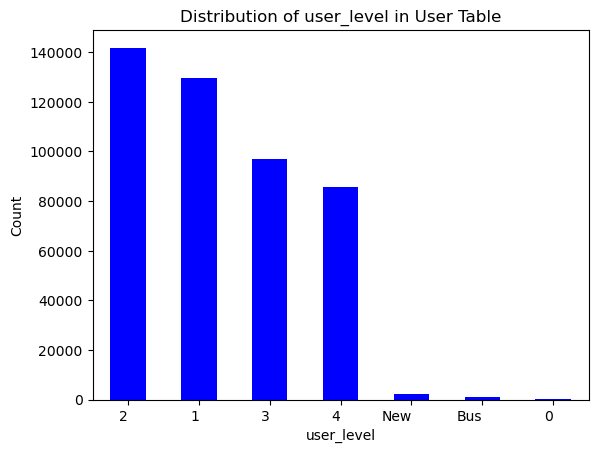

<Axes: >

Text(0.5, 1.0, 'Distribution of plus in User Table')

Text(0.5, 0, 'plus')

Text(0, 0.5, 'Count')

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

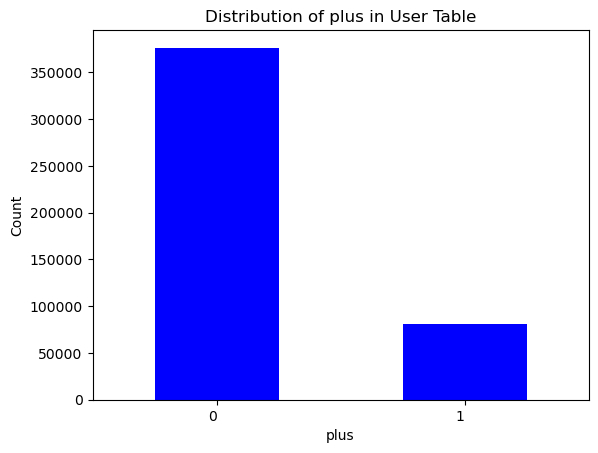

<Axes: >

Text(0.5, 1.0, 'Distribution of gender in User Table')

Text(0.5, 0, 'gender')

Text(0, 0.5, 'Count')

(array([0, 1, 2]), [Text(0, 0, 'F'), Text(1, 0, 'M'), Text(2, 0, 'U')])

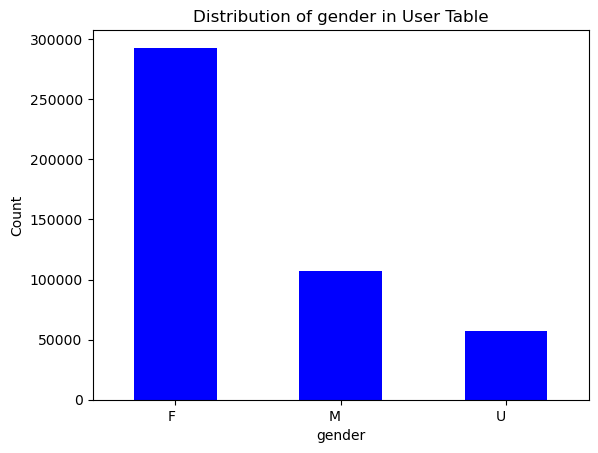

<Axes: >

Text(0.5, 1.0, 'Distribution of age in User Table')

Text(0.5, 0, 'age')

Text(0, 0.5, 'Count')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '26-35'),
  Text(1, 0, '16-25'),
  Text(2, 0, '36-45'),
  Text(3, 0, 'U'),
  Text(4, 0, '46-55'),
  Text(5, 0, '>=56'),
  Text(6, 0, '<=15')])

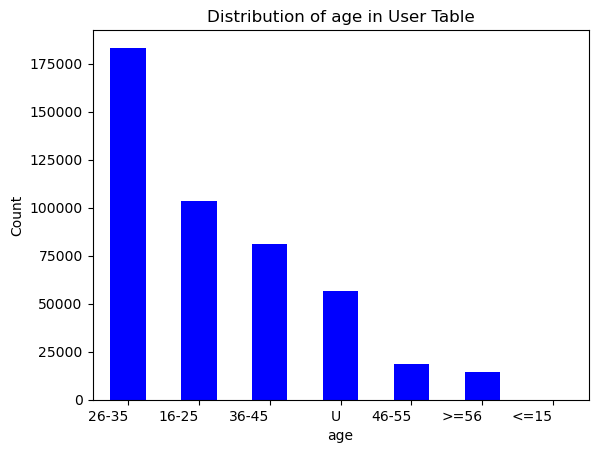

<Axes: >

Text(0.5, 1.0, 'Distribution of marital_status in User Table')

Text(0.5, 0, 'marital_status')

Text(0, 0.5, 'Count')

(array([0, 1, 2]), [Text(0, 0, 'M'), Text(1, 0, 'S'), Text(2, 0, 'U')])

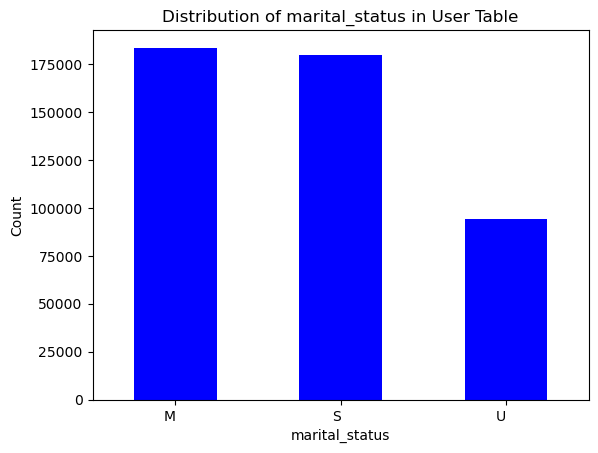

<Axes: >

Text(0.5, 1.0, 'Distribution of education in User Table')

Text(0.5, 0, 'education')

Text(0, 0.5, 'Count')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '3'),
  Text(1, 0, 'U'),
  Text(2, 0, '2'),
  Text(3, 0, '4'),
  Text(4, 0, '1')])

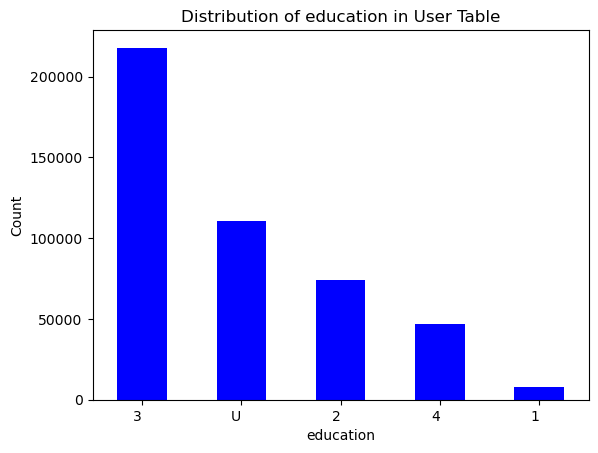

<Axes: >

Text(0.5, 1.0, 'Distribution of city_level in User Table')

Text(0.5, 0, 'city_level')

Text(0, 0.5, 'Count')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '2'),
  Text(1, 0, '1'),
  Text(2, 0, 'U'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

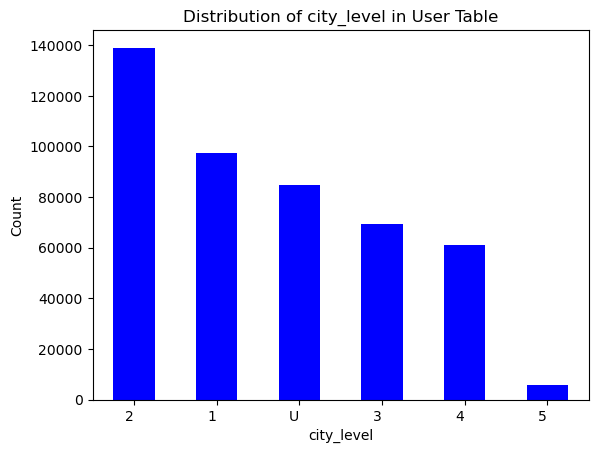

<Axes: >

Text(0.5, 1.0, 'Distribution of purchase_power in User Table')

Text(0.5, 0, 'purchase_power')

Text(0, 0.5, 'Count')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '2'),
  Text(1, 0, 'U'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '1'),
  Text(5, 0, '5')])

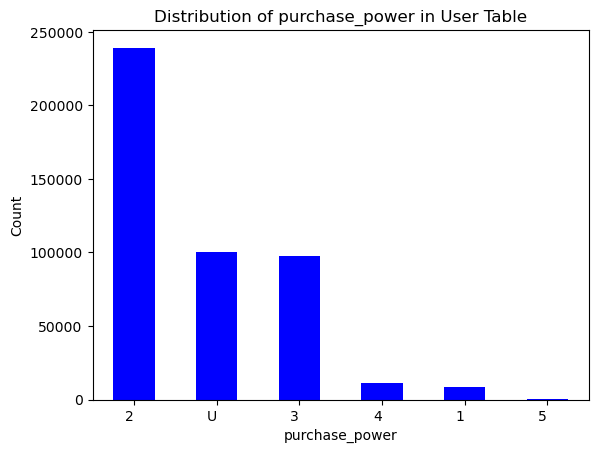

In [68]:
import matplotlib.pyplot as plt

user_data['user_level'].replace({'-1': 'New', '10': 'Bus'}, inplace=True)

categorical_variables = ['user_level', 'plus', 'gender', 'age', 'marital_status', 'education', 'city_level', 'purchase_power']

for variable in categorical_variables:
    user_data[variable].value_counts().plot(kind='bar', color='blue')
    plt.title(f'Distribution of {variable} in User Table')
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.xticks(rotation=360, ha='right')
    plt.show()
    
    #What is the education level of the majority? - 3, over 200,000
    #Which age level has the most users? - 26 to 35, over 175,000


25. Next we move to the table that resulted from Q11-Q15. Sum the quantity by day (we created this variable in Q14.) and save the results.
Create a line graph based on it. Hint: The outcome of the sum is a Pandas Series. Use the .index to get the day and .values to get the sum for the plot.<br>
Or you may use reset_index() to turn the results to a dataframe.
Which day has the most quantity sold? 

Text(0.5, 1.0, 'Quantity Sold by Day')

Text(0.5, 0, 'Day of the Month')

Text(0, 0.5, 'Quantity Sold')

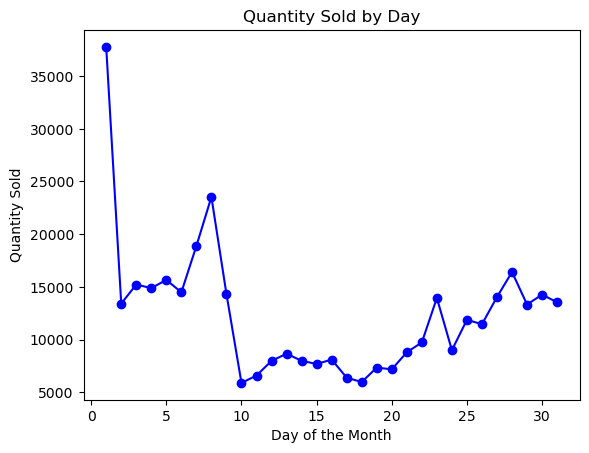

The day with the most quantity sold is 1 with a total of 37774 units.


In [67]:
import matplotlib.pyplot as plt

# Sum the quantity by day
quantity_by_day = filtered_data.groupby('order_day')['quantity'].sum()

plt.plot(quantity_by_day.index, quantity_by_day.values, marker='o', linestyle='-', color='b')
plt.title('Quantity Sold by Day')
plt.xlabel('Day of the Month')
plt.ylabel('Quantity Sold')
plt.show()

# Finding the day with the most quantity sold
max_quantity_day = quantity_by_day.idxmax()
max_quantity_value = quantity_by_day.max()

print(f"The day with the most quantity sold is {max_quantity_day} with a total of {max_quantity_value} units.")

#The day with the most quantity sold is 1 with a total of 38239 units.


26. Repeat Q25 for variable 'order_hour' we created in Q14. When is the peak time for orders during a day? Can you describe the customer order trend over a day's time?

Text(0.5, 1.0, 'Quantity Sold by Hour')

Text(0.5, 0, 'Hour of the Day')

Text(0, 0.5, 'Quantity Sold')

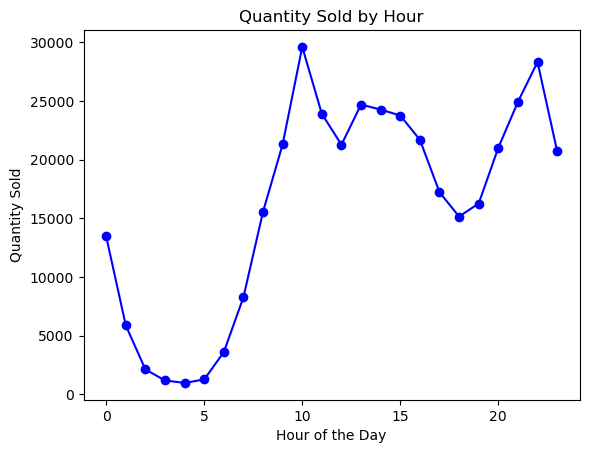

The peak time for orders is at 10 o'clock with a total of 29591 units.


In [60]:
import matplotlib.pyplot as plt

# Sum the quantity by hour
quantity_by_hour = filtered_data.groupby('order_hour')['quantity'].sum()

plt.plot(quantity_by_hour.index, quantity_by_hour.values, marker='o', linestyle='-', color='blue')
plt.title('Quantity Sold by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Quantity Sold')
plt.show()

peak_hour = quantity_by_hour.idxmax()
peak_quantity_value = quantity_by_hour.max()

print(f"The peak time for orders is at {peak_hour} o'clock with a total of {peak_quantity_value} units.")


#The peak time for orders is at 10 o'clock with a total of 29591 units.


27. Examine variable original_unit_price .<br>

1) Using describe() to check the stastitics. What is min, max and median?

In [61]:
filtered_data['original_unit_price'].describe()

#Minimum original unit price: 0.0
#Maximum original unit price: 7130.0
#Median original unit price: 85.0

count    315898.000000
mean        120.867210
std          87.629065
min           0.000000
25%          69.000000
50%          85.000000
75%         149.000000
max        7130.000000
Name: original_unit_price, dtype: float64

2) Find out the percentage of observations whose original_unit_price is greater than 350. Delete those observations using filtering. We will use the filtered dataset from now on.

In [62]:
percentage_above_350 = (filtered_data['original_unit_price'] > 350).mean() * 100

print(f"The percentage of observations with original_unit_price > 350 is: {percentage_above_350:.2f}%")

#updated data
filtered_data = filtered_data[filtered_data['original_unit_price'] <= 350]


The percentage of observations with original_unit_price > 350 is: 0.65%


3) Examine the distribution of original_unit_price, using bins range from 0 to 350, width 10. Which price range has the most orders?

(array([1.5876e+04, 3.6630e+03, 1.6820e+03, 4.5640e+03, 4.9610e+03,
        3.2915e+04, 3.1537e+04, 5.7240e+04, 1.9267e+04, 1.4141e+04,
        8.4430e+03, 5.5720e+03, 1.3102e+04, 1.6162e+04, 9.5800e+03,
        5.3300e+03, 2.4780e+03, 1.2135e+04, 3.3870e+03, 5.3610e+03,
        8.1100e+02, 6.3500e+02, 5.0000e+01, 2.6950e+03, 5.8090e+03,
        2.8450e+03, 2.0040e+03, 3.1800e+02, 4.3000e+02, 2.7036e+04,
        9.9100e+02, 3.2000e+01, 5.1800e+02, 2.2650e+03, 7.0000e+00,
        0.0000e+00]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
        220., 230., 240., 250., 260., 270., 280., 290., 300., 310., 320.,
        330., 340., 350., 360.]),
 <BarContainer object of 36 artists>)

Text(0.5, 1.0, 'Distribution of original_unit_price')

Text(0.5, 0, 'Original Unit Price')

Text(0, 0.5, 'Number of Orders')

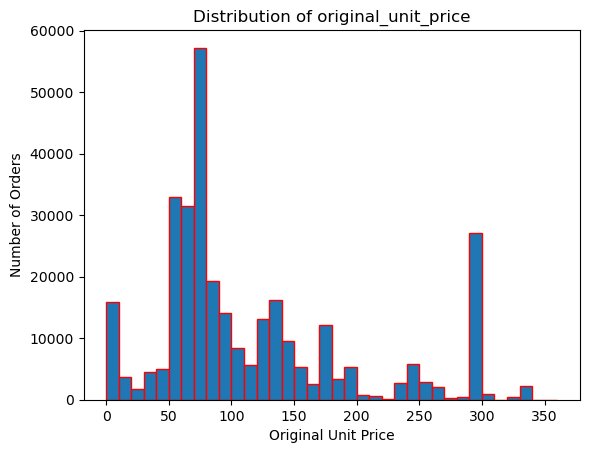

The price range with the most orders is: (70, 80]


In [63]:
bins = list(range(0, 361, 10))

plt.hist(filtered_data['original_unit_price'], bins=bins, edgecolor='red')

plt.title('Distribution of original_unit_price')
plt.xlabel('Original Unit Price')
plt.ylabel('Number of Orders')

plt.show()

most_orders_price_range = filtered_data.groupby(pd.cut(filtered_data['original_unit_price'], bins=bins)).size().idxmax()

print(f"The price range with the most orders is: {most_orders_price_range}")

#The price range with the most orders is: (70, 80]


28. Examine the distribution of final_unit_price, using bins range from -20 to 350, width 10. Comparing to original unit prices, how are the final prices different?

(array([0.0000e+00, 0.0000e+00, 1.5876e+04, 3.6630e+03, 1.6820e+03,
        4.5640e+03, 4.9610e+03, 3.2915e+04, 3.1537e+04, 5.7240e+04,
        1.9267e+04, 1.4141e+04, 8.4430e+03, 5.5720e+03, 1.3102e+04,
        1.6162e+04, 9.5800e+03, 5.3300e+03, 2.4780e+03, 1.2135e+04,
        3.3870e+03, 5.3610e+03, 8.1100e+02, 6.3500e+02, 5.0000e+01,
        2.6950e+03, 5.8090e+03, 2.8450e+03, 2.0040e+03, 3.1800e+02,
        4.3000e+02, 2.7036e+04, 9.9100e+02, 3.2000e+01, 5.1800e+02,
        2.2650e+03, 7.0000e+00, 0.0000e+00]),
 array([-20., -10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,
         90., 100., 110., 120., 130., 140., 150., 160., 170., 180., 190.,
        200., 210., 220., 230., 240., 250., 260., 270., 280., 290., 300.,
        310., 320., 330., 340., 350., 360.]),
 <BarContainer object of 38 artists>)

(array([8.9000e+01, 1.4520e+03, 1.9450e+04, 4.7850e+03, 1.0509e+04,
        3.7819e+04, 3.6622e+04, 4.2602e+04, 3.5412e+04, 1.9199e+04,
        9.4270e+03, 1.1268e+04, 1.1681e+04, 4.6090e+03, 1.0485e+04,
        5.0810e+03, 4.6640e+03, 5.4450e+03, 7.9960e+03, 1.7980e+03,
        2.1200e+03, 3.4790e+03, 1.0715e+04, 2.4290e+03, 8.0320e+03,
        2.4030e+03, 2.5380e+03, 6.8500e+02, 2.8700e+02, 2.3400e+02,
        1.3600e+02, 2.8800e+02, 7.1000e+01, 1.4000e+01, 5.0000e+00,
        1.3000e+01, 0.0000e+00, 0.0000e+00]),
 array([-20., -10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,
         90., 100., 110., 120., 130., 140., 150., 160., 170., 180., 190.,
        200., 210., 220., 230., 240., 250., 260., 270., 280., 290., 300.,
        310., 320., 330., 340., 350., 360.]),
 <BarContainer object of 38 artists>)

Text(0.5, 1.0, 'Distribution of Original and Final Unit Prices')

Text(0.5, 0, 'Unit Price')

Text(0, 0.5, 'Number of Orders')

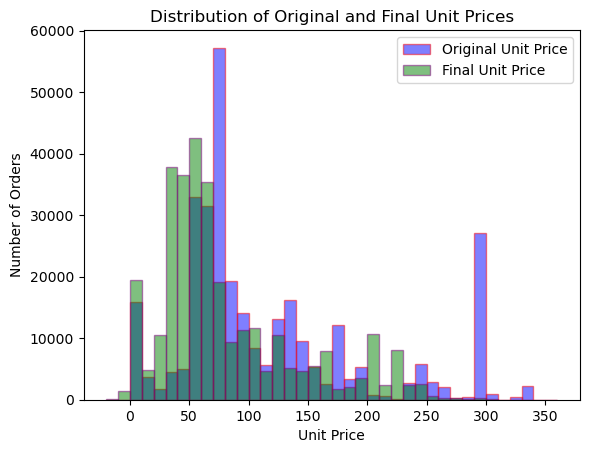

In [64]:
bins = list(range(-20, 361, 10))

plt.hist(filtered_data['original_unit_price'], bins=bins, alpha=0.5, edgecolor='red', color='blue', label='Original Unit Price')
plt.hist(filtered_data['final_unit_price'], bins=bins, alpha=0.5, edgecolor='purple',  color='green', label='Final Unit Price')

plt.title('Distribution of Original and Final Unit Prices')
plt.xlabel('Unit Price')
plt.ylabel('Number of Orders')
plt.legend()

plt.show()

#The original unit prices were wayy higher than the final. They were visually substantial.

29. Create a new variable 'sales', which is equal to the multiplication of quantity and final unit price. Make a graph for sales by day as in Q25.

Text(0.5, 1.0, 'Sales by Day')

Text(0.5, 0, 'Day of the Month')

Text(0, 0.5, 'Total Sales')

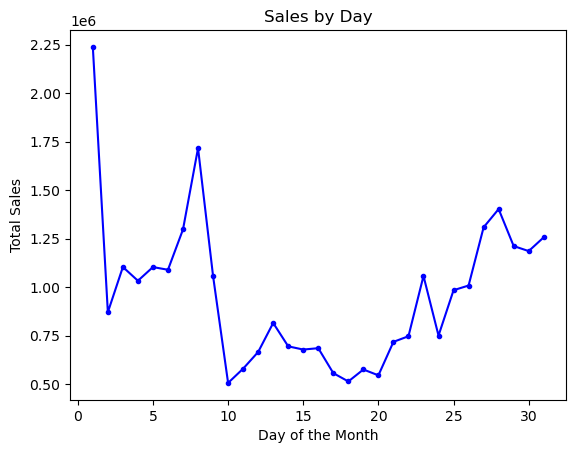

In [65]:
filtered_data['sales'] = filtered_data['quantity'] * filtered_data['final_unit_price']

# Sum the sales by day
sales_by_day = filtered_data.groupby('order_day')['sales'].sum()

plt.plot(sales_by_day.index, sales_by_day.values, marker='.', linestyle='-', color='blue')
plt.title('Sales by Day')
plt.xlabel('Day of the Month')
plt.ylabel('Total Sales')
plt.show()

30. Try to answer one descriptive question you asked in your project initial report.

<Figure size 800x400 with 0 Axes>

<Axes: ylabel='type_x'>

Text(0.5, 1.0, 'Order Volume Across Different Regions in China')

Text(0.5, 0, 'Total Order Volume')

Text(0, 0.5, 'Region')

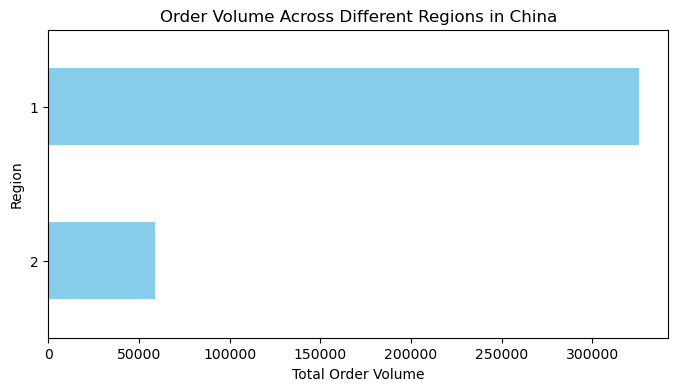

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by Region and calculate the total order volume
region_order_volume = filtered_data.groupby('type_x')['quantity'].sum()

# Create a bar chart to visualize order volume across different regions
plt.figure(figsize=(8, 4))
region_order_volume.sort_values().plot(kind='barh', color='skyblue')
plt.title('Order Volume Across Different Regions in China')
plt.xlabel('Total Order Volume')
plt.ylabel('Region')
plt.show()

#How does order volume vary across different regions in China?

### Assignment 11 starts from here: Q31-Q40.
We only covered a small part of data exploration in Assignment 10. If you are interested, you can make many more graphs to understand the data. <br>
Next we intend to build models to predict delivery times.

We want to use two sets of features to make predictions.<br>
1. order effect: This class of predictors captures thevcharacteristics of an order that may impact deliveryvtime, such as the number of items (SKUs), order size (quantity), order type (1P or 3P), discount rate and the number of gift items.<br>
2. User effect: The process may prioritize certain customers over others, for example, customers with a PLUSmembership or higher past purchase values.<br>
Note: Actually, it will be better if we can include real-time workloads of distribution centers. It can be done with this dataset, but might be a little too much for us. So, we will leave that part out.

We need to further process the data to prepare the features.<br>
<b>Note: Here I have done this part. You need to change the name of DataFrame "order_delivery_inner' to your dataframe name that results from all the previous steps. Make sure you run the cells before you proceed.</b>

31. The dataset we have so far is based on order-items. Each row is an item in an order. Now we need to aggregate by order to match order information with delivery information. Afterwards, each row is about one delivery / one order because we have already removed orders that have multiple deliveries.

First, let's calculate order values by multiply price and quantity.

In [78]:
import pandas as pd
# Original value of items
filtered_data['originValue'] = filtered_data['original_unit_price'] \
                                        * filtered_data['quantity']

# Final value of items                                    
filtered_data['finalValue'] = filtered_data['final_unit_price'] \
                                    * filtered_data['quantity']                                 

Next we aggregate by each order. <br>
Please pay attention to the variable names. They should be consistent with yours. Make changes when necessary. <br>

Variables that are the same across one order:<br>
user_ID<br>
order type - type_x<br>
delivery time - delivery_time<br>
order day - order_day<br>
order hour - order_hour<br>
<br>
<br>
Variables to be aggregated across one order:<br>
sku_ID - to count to calculate the number of different products<br>
quantity - to sum to calculate the order size<br>
originValue - to sum to calculate sales value with the original price<br>
finalValue - to sum to calculate final sales value<br>
discount rate<br>
gift_item - to sum to calculate the number of gift items<br>

Therefore, we need to do the following:<br>

1. For variables that are the same across one order, we can use the 'first' method to keep the value in the groupby result.<br>
2. For variables to be aggregated, we specify aggregation for each of them.<br>
3. We can use a dictionary to put all actions together.

In [79]:
agg_dict = {
    'user_ID': 'first',
    'type_x': 'first',
    'order_day': 'first',
    'order_time': 'first',
    'delivery_time': 'first',
    'sku_ID': 'count',
    'quantity': 'sum',
    'originValue': 'sum',
    'finalValue': 'sum',
    'gift_item': 'sum'
}

order_agg = filtered_data.groupby('order_ID').agg(agg_dict).reset_index()
order_agg.head()

,order_ID,user_ID,type_x,order_day,order_time,delivery_time,sku_ID,quantity,originValue,finalValue,gift_item
0,0000095025,57648ed1fc,1,19,2018-03-19 11:11:34,0 days 22:48:26,1,1,230.0,176.2,0
1,00000e13eb,c113527e40,2,9,2018-03-09 12:40:42,2 days 05:19:18,1,1,56.0,56.0,0
2,0000132b39,c4f5626c0d,1,13,2018-03-13 16:30:35,0 days 22:29:25,1,1,89.0,85.0,0
3,000064fa67,99439045cb,1,2,2018-03-02 10:56:17,0 days 08:03:43,1,1,298.0,208.0,0
4,0000bde331,20d84fc11a,1,17,2018-03-17 14:22:54,0 days 21:37:06,1,1,59.9,39.9,0


32. Merge user table with this aggregated order table.

In [81]:
user_data = pd.read_csv('C:\\Users\\prana\\Downloads\\JD Data (2)\\JD Data\\JD_user_data.csv')
order_user = pd.merge(order_agg, user_data, on = 'user_ID', how = 'inner')

33. We need to code a few more variables.

In [82]:
# First we remove the orders with originValue is 0
order_user = order_user[order_user['originValue'] != 0]

In [83]:

# Get the hour of the order_time and save it to a new variable 'order_hour'
order_user['order_hour'] = order_user['order_time'].dt.hour

# Calculate discount rate
order_user['dis_rate'] = (order_user['originValue'] - order_user['finalValue']) / order_user['originValue']

# Code 'busy_hour' to be busy vs. not busy
order_user['busy_hour'] = order_user['order_hour'].apply(lambda h: 1 if (8 <= h <= 22) else 0)

34. Prepare data for analysis. The target variable is 'delivery_time'.<br>
Features: 'type_x', 'sku_ID', 'quantity', 'finalValue', 'gift_item', 'plus', 'dis_rate', 'busy_hour'

In [84]:
order_user['delivery_time'] = pd.to_timedelta(order_user['delivery_time']).dt.total_seconds() / 3600

In [85]:
order_user = pd.get_dummies(order_user, columns=['gender', 'marital_status', 'age'], drop_first=True)



X = order_user[['type_x', 'sku_ID', 'quantity', 'finalValue', 'gift_item', 'plus', 'dis_rate', 'busy_hour']]
y = order_user['delivery_time']
order_user.iloc[2]

order_ID                      0000132b39
user_ID                       c4f5626c0d
type_x                                 1
order_day                             13
order_time           2018-03-13 16:30:35
delivery_time                  22.490278
sku_ID                                 1
quantity                               1
originValue                         89.0
finalValue                          85.0
gift_item                              0
user_level                             2
first_order_month                2016-06
plus                                   0
education                              3
city_level                             2
purchase_power                         1
order_hour                            16
dis_rate                        0.044944
busy_hour                              1
gender_M                               0
gender_U                               0
marital_status_S                       1
marital_status_U                       0
age_26-35       

35. Prepare the training and test datasets

In [86]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape
X_test.shape

(194722, 8)

(83453, 8)

36. Train a Decision Tree regression model.

In [87]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

dt_regressor = DecisionTreeRegressor(random_state=42)

dt_regressor.fit(X_train, y_train)

train_predictions = dt_regressor.predict(X_train)

test_predictions = dt_regressor.predict(X_test)

y_train_numeric = y_train.astype(np.int64)
y_test_numeric = y_test.astype(np.int64)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train_numeric, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test_numeric, test_predictions))

print("Training RMSE:", train_rmse)
print("Test RMSE:", test_rmse)


DecisionTreeRegressor(random_state=42)

Training RMSE: 22.091446284900385
Test RMSE: 26.622305926572817


37. Make predictions on the testing data.

In [88]:
test_predictions = dt_regressor.predict(X_test)

print("Predicted values on the test set:")
print(test_predictions)

Predicted values on the test set:
[37.83700855 24.60143617 37.46199444 ... 25.98941893 22.12701389
 28.42532407]


38. Evaluate the model using RMSE

In [89]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
dt_regressor.fit(X_train, y_train)

# Make predictions on the test set
test_predictions = dt_regressor.predict(X_test)

y_test_numeric = y_test.astype(np.int64)

# Calculate RMSE on the test set
test_rmse = np.sqrt(mean_squared_error(y_test_numeric, test_predictions))

print("Test RMSE:", test_rmse)

DecisionTreeRegressor(random_state=42)

Test RMSE: 26.622305926572817


In [90]:
# To understand the RMSE, We check the statistics of the target variable.
order_user['delivery_time'].describe()
# It seems the mean is about 33.40 hours. 
# the prediction seems not very good.
#The large magnitudes of these errors suggest that the model is not performing well in terms of predicting the target variable.
#The model's predictions deviate significantly from the actual values.
#If the training RMSE is much lower than the test RMSE it may indicate that the model is overfitting the training data. 
#Overfitting occurs when a model learns the training data too well, capturing noise and idiosyncrasies that do not generalize to new, unseen data.

count    278175.000000
mean         33.679660
std          28.369402
min         -16.583333
25%          17.348333
50%          23.557778
75%          43.032639
max         641.217500
Name: delivery_time, dtype: float64

<Figure size 800x500 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation matrix for Selected Features')

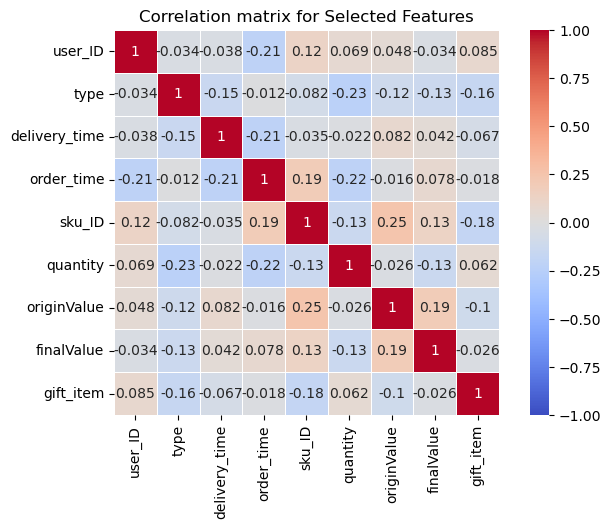

In [73]:
# Given the list of selected features, I'll create a sample dataframe for demonstration purposes
selected_features_actual = [
    'user_ID',
    'type',
    'delivery_time',
    'order_time',
    'sku_ID',
    'quantity',
    'originValue',
    'finalValue',
    'gift_item'
]

# Generating random data for these features for illustration
np.random.seed(42)  # for reproducibility
data_actual = {feature: np.random.rand(100) for feature in selected_features_actual}

df_selected_features = pd.DataFrame(data_actual)

# Calculate the correlation matrix for the selected features
correlation_matrix_actual = df_selected_features.corr()

# Plot the correlogram
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix_actual, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title("Correlation matrix for Selected Features")
plt.show()
